# Basic Regression Models

In [2]:
# data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# visualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# model
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import neural_network
from sklearn import metrics
 
from utils import read_data

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
count, df = read_data(normalize = True)

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
35064 rows per station, total 382168 rows


In [4]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.00000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,79.432383,0.102882,0.030716,0.168646,0.114135,0.053384,0.543393,0.470422,0.590126,0.000897,0.131669,0.071424,0.081480,0.058058,0.073251,0.102884,0.066976,0.060581,0.078609,0.04627,0.048055,0.042016,0.054154,0.068964,0.041654,0.057975,0.047649
std,80.154901,0.091654,0.042637,0.121743,0.116884,0.052960,0.185778,0.173053,0.211957,0.011364,0.094027,0.257532,0.273571,0.233854,0.260548,0.303808,0.249980,0.238560,0.269129,0.21007,0.213882,0.200625,0.226322,0.253394,0.199799,0.233696,0.213023
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.034102,0.003431,0.072917,0.040404,0.009602,0.373984,0.331126,0.414747,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.080241,0.013436,0.142361,0.080808,0.041825,0.557724,0.463576,0.599078,0.000000,0.106061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111.000000,0.143430,0.037450,0.239583,0.141414,0.076379,0.700813,0.605960,0.784946,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,844.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,time_stamp,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
20,13.0,0.023069,0.023442,0.010417,0.101010,0.056767,0.349593,0.740066,0.270353,0.0,0.143939,Gucheng,2013-03-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21,15.0,0.021063,0.027444,0.038194,0.111111,0.048362,0.339837,0.756623,0.285714,0.0,0.053030,Gucheng,2013-03-01,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,16.0,0.026078,0.031447,0.059028,0.111111,0.041825,0.344715,0.761589,0.282642,0.0,0.075758,Gucheng,2013-03-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,16.0,0.026078,0.027444,0.062500,0.101010,0.040891,0.326829,0.764901,0.282642,0.0,0.083333,Gucheng,2013-03-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24,14.0,0.016048,0.047456,0.142361,0.131212,0.023147,0.318699,0.769868,0.276498,0.0,0.106061,Gucheng,2013-03-02,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'station', 'time_stamp', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW'],
      dtype='object')

In [7]:
# drop columns
cols = ['PM10', 'station', 'time_stamp', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW']
df = df.drop(columns=cols)

In [8]:
df.describe()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,79.432383,0.030716,0.168646,0.114135,0.053384,0.543393,0.470422,0.590126,0.000897,0.131669
std,80.154901,0.042637,0.121743,0.116884,0.052960,0.185778,0.173053,0.211957,0.011364,0.094027
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.003431,0.072917,0.040404,0.009602,0.373984,0.331126,0.414747,0.000000,0.068182
50%,55.000000,0.013436,0.142361,0.080808,0.041825,0.557724,0.463576,0.599078,0.000000,0.106061
75%,111.000000,0.037450,0.239583,0.141414,0.076379,0.700813,0.605960,0.784946,0.000000,0.166667
max,844.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
len(df[df['RAIN']==0.0])

367049

In [10]:
# drop column "RAIN" as most of data are zero
# df = df.drop(columns=["RAIN"])

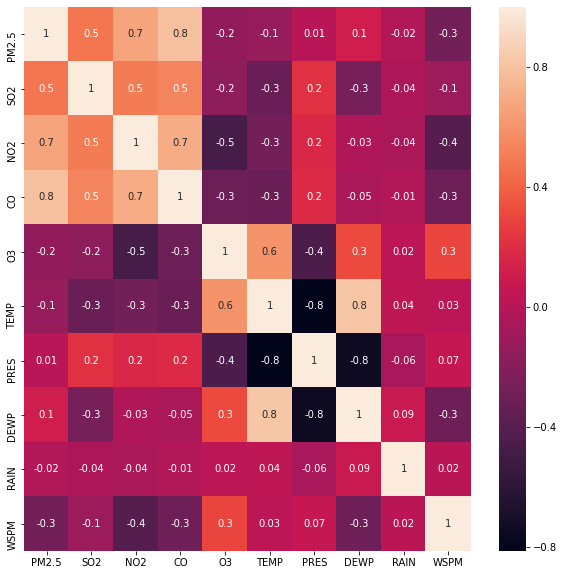

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [12]:
# find correlation factor between features
df.corr()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.482209,0.670753,0.792041,-0.151149,-0.128907,0.013717,0.118009,-0.015268,-0.275686
SO2,0.482209,1.000000,0.501317,0.535289,-0.167093,-0.320991,0.218994,-0.266446,-0.040618,-0.109259
NO2,0.670753,0.501317,1.000000,0.705651,-0.476812,-0.276387,0.172287,-0.028276,-0.043946,-0.402566
CO,0.792041,0.535289,0.705651,1.000000,-0.315060,-0.323402,0.183800,-0.054173,-0.013302,-0.297760
O3,-0.151149,-0.167093,-0.476812,-0.315060,1.000000,0.597098,-0.447437,0.313267,0.023194,0.296714
TEMP,-0.128907,-0.320991,-0.276387,-0.323402,0.597098,1.000000,-0.812456,0.820672,0.037182,0.026664
PRES,0.013717,0.218994,0.172287,0.183800,-0.447437,-0.812456,1.000000,-0.750758,-0.060999,0.072249
DEWP,0.118009,-0.266446,-0.028276,-0.054173,0.313267,0.820672,-0.750758,1.000000,0.086424,-0.299137
RAIN,-0.015268,-0.040618,-0.043946,-0.013302,0.023194,0.037182,-0.060999,0.086424,1.000000,0.021866
WSPM,-0.275686,-0.109259,-0.402566,-0.297760,0.296714,0.026664,0.072249,-0.299137,0.021866,1.000000


# Train Test Split

In [13]:
# split data into trainng 90% and test 10%
# split training data into training set and validation set 80:20 NOT RANDOM
total_data_count = len(df)
test_data_count = int(total_data_count*0.1)
training_data_count = int((total_data_count - test_data_count)*0.8)

test_df = df[0: test_data_count]
training_df = df[test_data_count : training_data_count + test_data_count]
validation_df = df[training_data_count + test_data_count ::]

In [14]:
X_train = training_df.drop(columns=["PM2.5"])
y_train = training_df["PM2.5"]

X_validation = validation_df.drop(columns=["PM2.5"])
y_validation = validation_df["PM2.5"]

X_test = test_df.drop(columns=["PM2.5"])
y_test = test_df["PM2.5"]

In [22]:
print(len(training_df))
print(len(validation_df))
print(len(test_df))

275161
68791
38216


In [16]:
def model_fit_evaluate(reg, x_train, y_train, x_validation, y_validation):
    # Fit the mode: 
    print('Model \n', reg)
    reg.fit(x_train, y_train)
    
    # Make predictions using the validation set
    y_validation_pred = reg.predict(x_validation)
    
    # The coefficients
    if hasattr(reg, 'coef_'):
        print('Coefficients: \n', reg.coef_)
    if hasattr(reg, 'feature_importances_'):
        print('Feature Importances: \n', reg.feature_importances_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_validation_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_validation_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_validation_pred)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination:', metrics.r2_score(y_validation, y_validation_pred))
    
    # The line / model
    plt.figure(figsize=(8,8))
    lineStart = y_validation.min() 
    lineEnd = y_validation.max() 
    plt.scatter(y_validation, y_validation_pred, marker='x')
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

# 1. Linear Regression

Model 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Coefficients: 
 [ 157.35660071  205.15375475  379.98644287  290.07502084  -98.90403509
  -18.86661022  111.78942844 -114.08992069   59.88399764]
Mean Absolute Error: 27.421364574186477
Mean Squared Error: 1860.6423108418014
Root Mean Squared Error: 43.135163275937664
Coefficient of determination: 0.6920949775044615


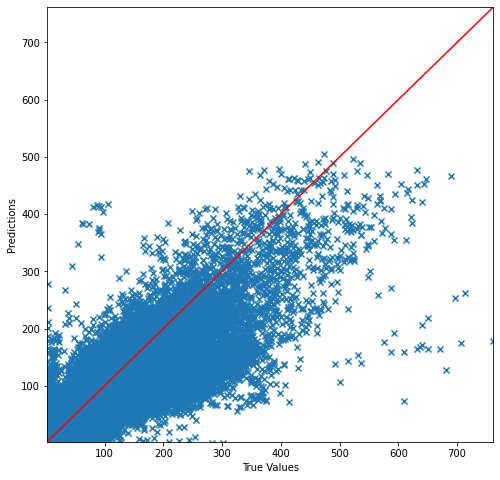

In [17]:
reg_linear = linear_model.LinearRegression()
model_fit_evaluate(reg_linear, X_train, y_train, X_validation, y_validation)

# 2. LARS Lasso
Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

Model 
 LassoLars(alpha=0.005, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
          positive=False, precompute='auto', verbose=False)
Coefficients: 
 [111.63224316 161.08248024 402.84745801 142.00612925   0.
   0.          40.77585411   0.           0.        ]
Mean Absolute Error: 26.976466427549422
Mean Squared Error: 1913.5367372872859
Root Mean Squared Error: 43.74399087060171
Coefficient of determination: 0.6833418391555774
CPU times: user 123 ms, sys: 23.3 ms, total: 147 ms
Wall time: 57.9 ms


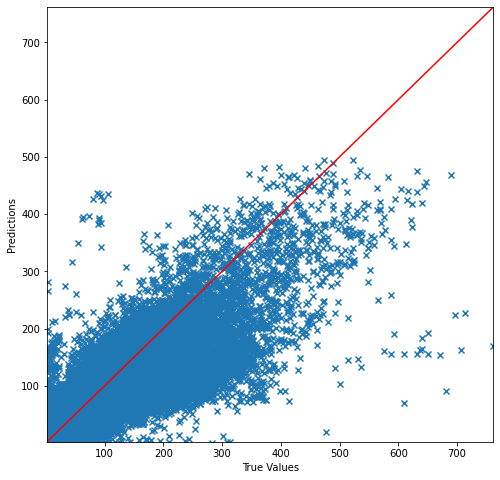

In [18]:
%%time
reg_lasso = linear_model.LassoLars(alpha=.005)
model_fit_evaluate(reg_lasso, X_train, y_train, X_validation, y_validation)

# 3. Linear SVM Regression

Model 
 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
Coefficients: 
 [114.40284248 135.19517464 436.19762687 226.56748142 -43.78987304
 -16.63247309  51.9176807  -37.78245673  30.3797664 ]
Mean Absolute Error: 27.177030146113356
Mean Squared Error: 2018.943847531034
Root Mean Squared Error: 44.93265903027589
Coefficient of determination: 0.6658987344483072
CPU times: user 492 ms, sys: 38.6 ms, total: 530 ms
Wall time: 461 ms


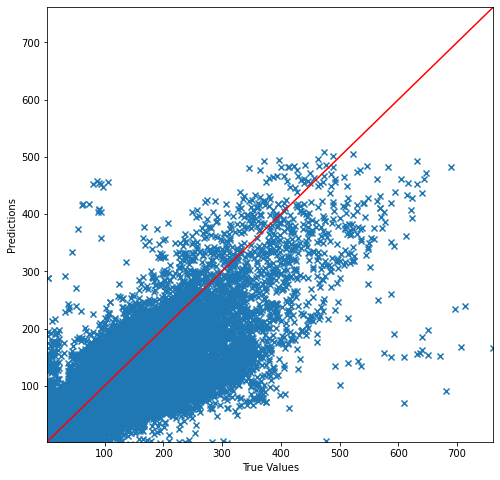

In [19]:
%%time
reg_linearsvm = svm.LinearSVR()
model_fit_evaluate(reg_linearsvm, X_train, y_train, X_validation, y_validation)

# 4. Outlier-robust regressors

Theil-Sen Estimator: robust multivariate regression model.

The algorithm calculates least square solutions on subsets with size n_subsamples of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency. Since the number of least square solutions is “n_samples choose n_subsamples”, it can be extremely large and can therefore be limited with max_subpopulation. If this limit is reached, the subsets are chosen randomly. In a final step, the spatial median (or L1 median) is calculated of all least square solutions.

Model 
 TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=None, tol=0.001, verbose=False)
Coefficients: 
 [161.25729275 136.22626886 485.87807856 272.31997132 -78.77866065
 -22.76074883  88.77442046 -49.68675185  54.16733354]
Mean Absolute Error: 27.025064148745987
Mean Squared Error: 1846.9314918515797
Root Mean Squared Error: 42.975940848939885
Coefficient of determination: 0.694363887549674
CPU times: user 59.1 s, sys: 10.7 s, total: 1min 9s
Wall time: 1min 12s


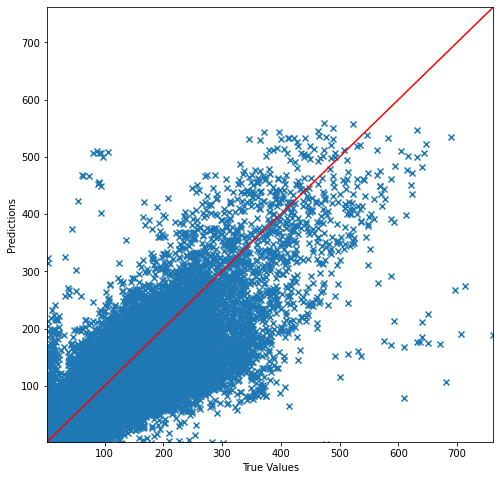

In [23]:
%%time
reg_huber = linear_model.TheilSenRegressor()
model_fit_evaluate(reg_huber, X_train, y_train, X_validation, y_validation)

# 5. Decision Trees Regression

Model 
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Feature Importances: 
 [0.04367215 0.13095227 0.61213395 0.03351323 0.03957397 0.04540159
 0.07369103 0.00326748 0.01779434]
Mean Absolute Error: 28.070523760375632
Mean Squared Error: 2174.9202721286215
Root Mean Squared Error: 46.636040485107884
Coefficient of determination: 0.6400872583549974
CPU times: user 2.14 s, sys: 28.1 ms, total: 2.17 s
Wall time: 2.17 s


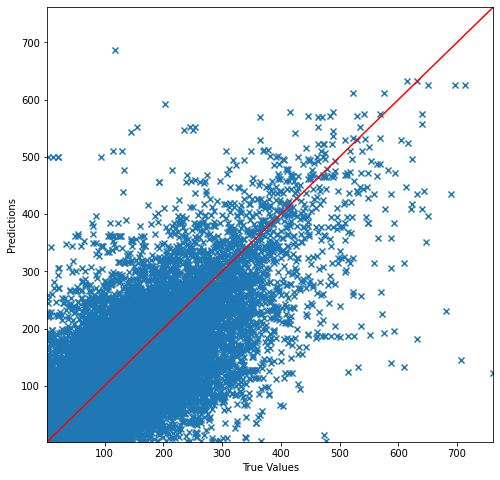

In [21]:
%%time
reg_dt = tree.DecisionTreeRegressor()
model_fit_evaluate(reg_dt, X_train, y_train, X_validation, y_validation)

# Summary On Basic Models
- The lowest RMSE is 42.976 from TheilSenRegressor
- Coefficient of Detemination are all around 0.6 

Reference: 
https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score